In [1]:
using Pkg
Pkg.activate("../../")
Pkg.add("Plots")
Pkg.add("LaTeXStrings")


  Activating project at `c:\Users\jakdar\Uni\bachelorarbeit\VeryDiff`
    Updating registry at `C:\Users\jakdar\.julia\registries\General.toml`
   Resolving package versions...
      Compat entries added for 
  No Changes to `C:\Users\jakdar\Uni\bachelorarbeit\VeryDiff\Project.toml`
  No Changes to `C:\Users\jakdar\Uni\bachelorarbeit\VeryDiff\Manifest.toml`
Precompiling project...
   6059.4 ms  ✓ VeryDiff
  1 dependency successfully precompiled in 30 seconds. 259 already precompiled.
   Resolving package versions...
      Compat entries added for 
  No Changes to `C:\Users\jakdar\Uni\bachelorarbeit\VeryDiff\Project.toml`
  No Changes to `C:\Users\jakdar\Uni\bachelorarbeit\VeryDiff\Manifest.toml`


In [4]:
using VeryDiff, Plots, LinearAlgebra, LaTeXStrings

include("../util.jl")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2728393
Academic license 2728393 - for non-commercial use only - registered to uz___@student.kit.edu


RecipesBase.apply_recipe

In [5]:
function box_to_zono(box::Matrix{Float64})
    α = (box[:, 2] - box[:, 1]) ./ 2
    β = (box[:, 2] + box[:, 1]) ./ 2
    return Zonotope(Diagonal(α), β, nothing)
end

box_to_zono (generic function with 1 method)

In [6]:
box_to_zono([-1.0 1.0; -1.0 1.0])

Zonotope([1.0 0.0; 0.0 1.0], [0.0, 0.0], nothing)

[-0.6000000000000001 2.0; -2.0 0.7999999999999998]


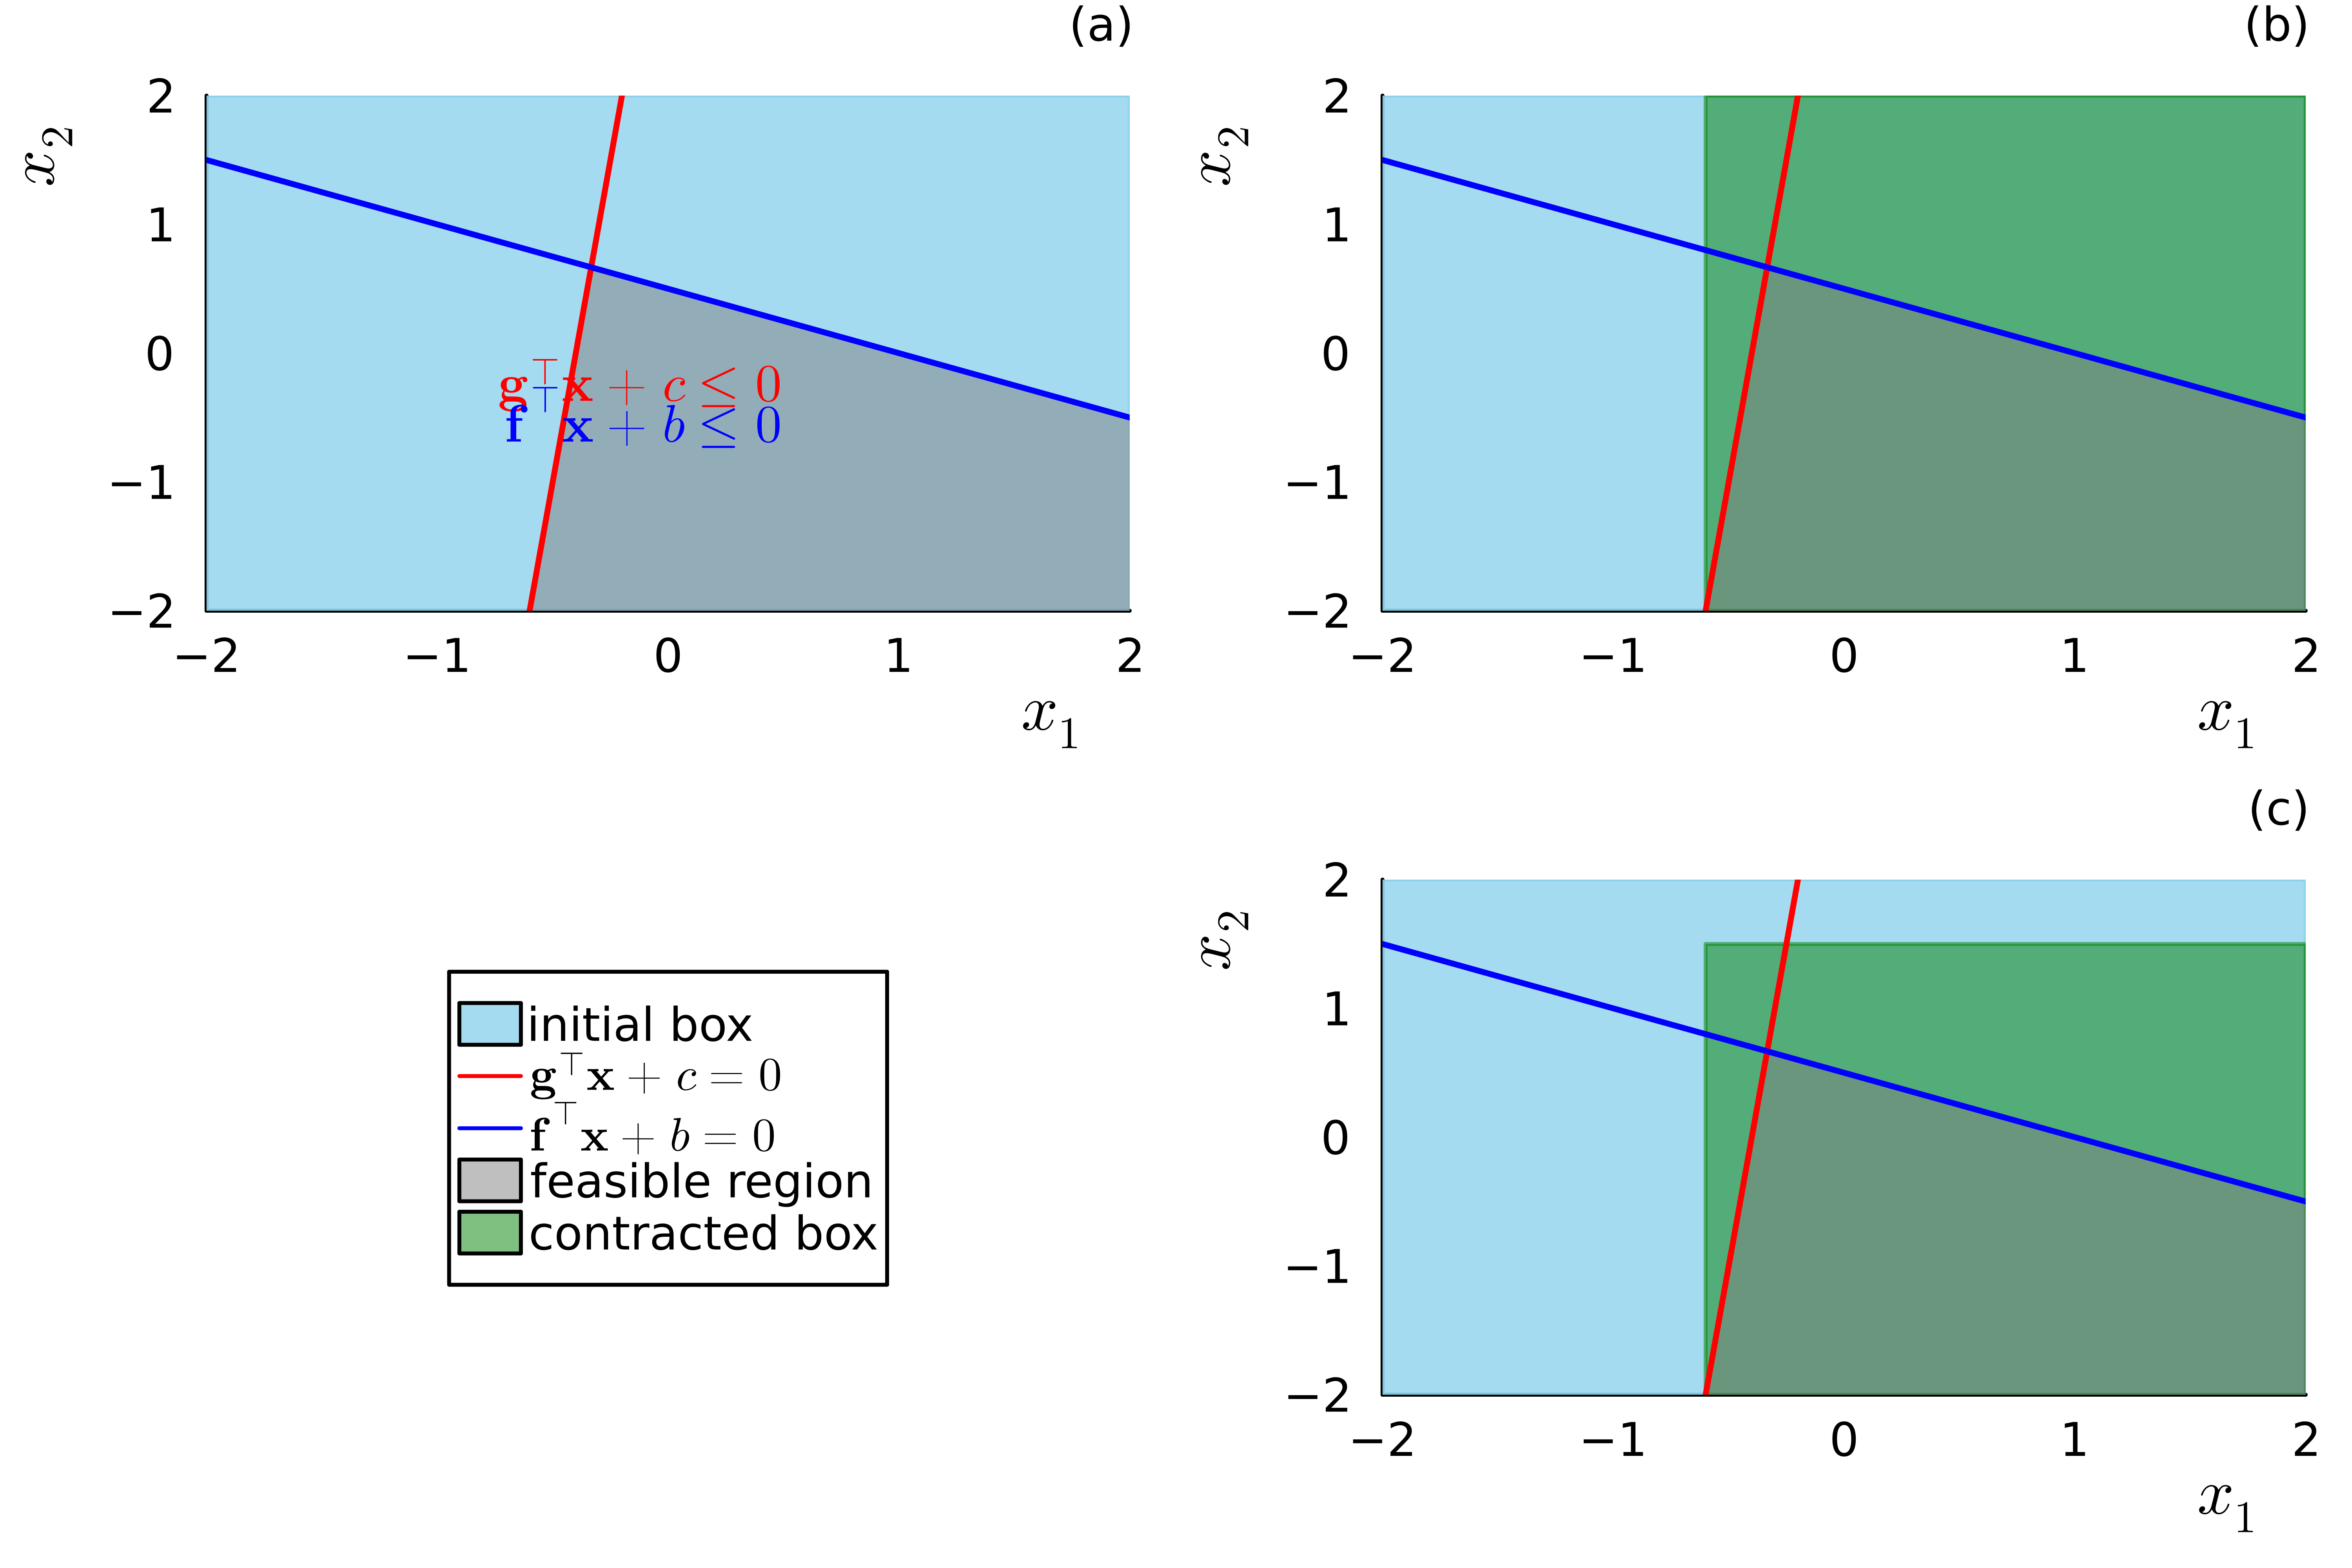

In [31]:
Zin = Zonotope([2.0 0.0; 0.0 2.0], [0.0, 0.0], nothing)
bounds = zono_bounds(Zin)
box = [-ones(2) ones(2)]

xlims, ylims = bounds[1, :], bounds[2, :]

p = plot(
    dpi=1000, xlims=xlims, ylims=ylims, grid=false, xlabel=L"x_1", ylabel=L"x_2", widen=false;
    layout = (2, 2), labelfont=font(5), legend=false, draw_arrow=true, 
    xguidefonthalign=:right, yguidefontvalign=:top, tick_direction=:none, #x_formatter=:none, y_formatter=:none
    title = ["(a)" "(b)" "" "(c)"], titleloc = :right, titlefont=font(8)
)

plot!(
    p, [0 0 0 0 0], seriestype = [:shape :path :path :shape :shape], 
    alpha=[0.75 1.0 1.0 0.5 0.5], showaxis=false, grid=false, 
    label=["initial box" L"\mathbf{g}^\top\mathbf{x} + c = 0" L"\mathbf{f}^\top\mathbf{x} + b = 0" "feasible region" "contracted box"];
    c=[:skyblue :red :blue :grey :green],
    legend=:inside, framestyle=:none, subplot=3
)

plot!(p, Zin, alpha=0.75, c=:skyblue, subplot=1)
plot!(p, Zin, alpha=0.75, c=:skyblue, subplot=2)
plot!(p, Zin, alpha=0.75, c=:skyblue, subplot=4)

x = range(xlims[1], length=1000, step=0.01)

g, c, d₁ = [-5.0, 0.5], -2.0, -1
x₁ = x
y₁ = -(g[1]*x₁ .+ c) / g[2]

f, b, d₂ = [0.5, 1.0], -0.5, -1
x₂ = x
y₂ = -(f[1]*x₂ .+ b) / f[2]

x₃ = x
h = x -> min(-(g[1]*x + c) / g[2], -(f[1]*x + b) / f[2])
plot!(p, h, x₃, fill=(h(-1), 0.5), lw=:0.0, c=:grey, subplot=1)

println(contract_zono(contract_zono(zono_bounds(Zin), g, c, d₁), f, b, d₂))

# Z = Zonotope([2.0 0.0; 0.0 2.0], zeros(2), nothing)
# bounds = contract_zono(contract_zono(zono_bounds(Zin), g, c, d₁), f, b, d₂)
# lower = @view bounds[:, 1]
# upper = @view bounds[:, 2]
# α = (upper - lower) ./ 2
# β = (upper + lower) ./ 2
# println("l: $lower, u: $upper")
# println("α: $α, β: $β")
# Z = transform_offset_zono(bounds, Z)
# z_bounds = zono_bounds(Z)
# println("G: $(Z.G), c: $(Z.c)")
# println("l: $(z_bounds[:, 1]), u: $(z_bounds[:, 2])")


# box₁ = contract_zono(contract_zono(zono_bounds(Zin), g, c, d₁), f, b, d₂)
box₁ = contract_zono(zono_bounds(Zin), g, c, d₁)
# box₁ = contract_zono(contract_zono(zono_bounds(Zin), g, c, d₁), f, b, d₂)
# Z₁ = transform_offset_zono(box₁, Zin)
Z₁ = box_to_zono(box₁)
plot!(p, Z₁, alpha=0.5, c=:green, subplot=2)

plot!(p, h, x₃, fill=(h(-1), 0.5), lw=:0.0, c=:grey, subplot=2)

box₂ = contract_zono(contract_zono(zono_bounds(Zin), f, b, d₂), g, c, d₁)
# Z₂ = transform_offset_zono(box₂, Zin)
Z₂ = box_to_zono(box₂)
plot!(p, Z₂, alpha=0.5, c=:green, subplot=4)

plot!(p, h, x₃, fill=(h(-1), 0.5), lw=:0.0, c=:grey, subplot=4)

plot!(p, x₁, y₁, lw=:1.5, c=:red, subplot=1)
plot!(p, x₁, y₁, lw=:1.5, c=:red, subplot=2)
plot!(p, x₁, y₁, lw=:1.5, c=:red, subplot=4)

plot!(p, x₂, y₂, lw=:1.5, c=:blue, subplot=1)
plot!(p, x₂, y₂, lw=:1.5, c=:blue, subplot=2)
plot!(p, x₂, y₂, lw=:1.5, c=:blue, subplot=4)

annotate!(0.5, -0.25, text(L"\mathbf{g}^\top\mathbf{x} + c \leq 0", :red, :right, 9), subplot=1)
annotate!(0.5, -0.5, text(L"\mathbf{f}^\top\mathbf{x} + b \leq 0", :blue, :right, 9), subplot=1)

savefig(p, "contract_zono_order.pdf")

# println(geometric_distance(zeros(2), g, c))
# println(geometric_distance(zeros(2), f, b))

p

[-0.75 1.0; -1.0 0.4000000000000001]


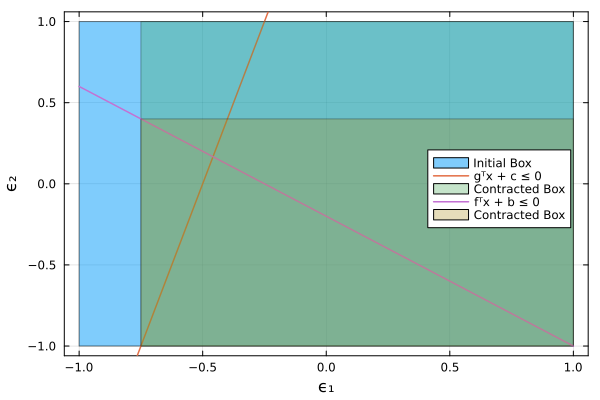

In [ ]:
box = [-ones(2) ones(2)]

p = plot(xlims=(-1, 1), ylims=(-1, 1), xlabel="ϵ₁", ylabel="ϵ₂", widen=true, framestyle=:box, legend=:right; label=nothing)

plot!(p, box_to_zono(box), alpha=0.5, label="Initial Box")

g, c, d = [-4.0, 1.0], -2.0, -1
# g₁x₁ + g₂x₂ + c = 0 ⇔ -4x₁ + x₂ - 2 = 0 ⇔ x₂ = 4x₁ + 2
x₁ = range(-1.0, 1.0, length=2)
x₂ = 4.0*x₁ .+ 2.0
plot!(p, x₁, x₂, label="gᵀx + c ≤ 0", lw=:1.5)

box = contract_zono(box, g, c, d)
plot!(p, box_to_zono(box), alpha=0.3, label="Contracted Box")

f, b, d = [0.8, 1.0], 0.2, -1ö
# f₁x₁ + f₂x₂ + b = 0 ⇔ 0.8x₁ + x₂ + 0.2 = 0 ⇔ x₂ = -0.8x₁ - 0.2
x₁ = range(-1.0, 1.0, length=2)
x₂ = -0.8*x₁ .- 0.2
plot!(p, x₁, x₂, label="fᵀx + b ≤ 0", lw=:1.5)

box = contract_zono(box, f, b, d)
plot!(p, x₁, x₂, label="fᵀx + b ≤ 0", lw=:1.5)
plot!(p, box_to_zono(box), alpha=0.3, label="Contracted Box")

p

In [1]:
box = [-ones(2) ones(2)]

p = plot(xlims=(-1, 1), ylims=(-1, 1), xlabel="ϵ₁", ylabel="ϵ₂", widen=true, framestyle=:box, legend=:right; label=nothing)

plot!(p, box_to_zono(box), alpha=0.5, label="Initial Box")

f, b, d = [0.8, 1.0], 0.2, -1
# f₁x₁ + f₂x₂ + b = 0 ⇔ 0.8x₁ + x₂ + 0.2 = 0 ⇔ x₂ = -0.8x₁ - 0.2
x₁ = range(-1.0, 1.0, length=2)
x₂ = -0.8*x₁ .- 0.2

box = contract_zono(box, f, b, d)
plot!(p, x₁, x₂, label="fᵀx + b ≤ 0", lw=:1.5)
plot!(p, box_to_zono(box), alpha=0.3, label="Contracted Box")

g, c, d = [-4.0, 1.0], -2.0, -1
# g₁x₁ + g₂x₂ + c = 0 ⇔ -4x₁ + x₂ - 2 = 0 ⇔ x₂ = 4x₁ + 2
x₁ = range(-1.0, 1.0, length=2)
x₂ = 4.0*x₁ .+ 2.0

box = contract_zono(box, g, c, d)
plot!(p, x₁, x₂, label="gᵀx + c ≤ 0", lw=:1.5)
plot!(p, box_to_zono(box), alpha=0.3, label="Contracted Box")

p

UndefVarError: UndefVarError: `plot` not defined in `Main`
Suggestion: check for spelling errors or missing imports.